In [ ]:
import os
import glob
import pandas as pd
import numpy as np 

np.random.seed(25)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import f1_score
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix
import pickle

In [ ]:
df_1 = pd.read_csv("/content/dataset-of-00s.csv",header=0,index_col=0)
df_2 = pd.read_csv("/content/dataset-of-10s.csv",header=0,index_col=0)
df_3 = pd.read_csv("/content/dataset-of-60s.csv",header=0,index_col=0)
df_4 = pd.read_csv("/content/dataset-of-70s.csv",header=0,index_col=0)
df_5 = pd.read_csv("/content/dataset-of-80s.csv",header=0,index_col=0)
df_6 = pd.read_csv("/content/dataset-of-90s.csv",header=0,index_col=0)

In [ ]:
#concatinating the datasets to one dataframe df

data= pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])

In [ ]:
y = data.target
x = data[['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit','sections']]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12)

#### RANDOM FOREST

In [ ]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler().fit(x_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

**One-hot encode the labels**

In [ ]:
#One-hot encode output labels (y)
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# Create a random forest classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=25) 
model = model.fit(x_train_scaled, y_train)

In [ ]:
print(f"Train score: {model.score(x_train_scaled, y_train)}")
print(f"Test score: {model.score(x_test_scaled, y_test)}")


Train score: 0.9948425184079924
Test score: 0.7857351367130485


In [ ]:
# Validation of feature importance
importances = model.feature_importances_
importances

array([0.10287576, 0.08173045, 0.02853718, 0.07805985, 0.01004692,
       0.07376693, 0.1138987 , 0.17116731, 0.05071776, 0.06916917,
       0.05293697, 0.07310859, 0.00710892, 0.04966541, 0.03721007])

In [ ]:
# We can sort the features by their importance

sorted(zip(rf.feature_importances_, x.columns), reverse=True)

[(0.17116730720286885, 'instrumentalness'),
 (0.1138986962097133, 'acousticness'),
 (0.10287576283304017, 'danceability'),
 (0.0817304537519217, 'energy'),
 (0.07805985063695234, 'loudness'),
 (0.07376692635635022, 'speechiness'),
 (0.07310859428848573, 'duration_ms'),
 (0.06916917488348379, 'valence'),
 (0.052936969585063866, 'tempo'),
 (0.050717758993032026, 'liveness'),
 (0.04966540807356965, 'chorus_hit'),
 (0.03721007215977602, 'sections'),
 (0.028537182955871425, 'key'),
 (0.010046918876437218, 'mode'),
 (0.007108923193433837, 'time_signature')]

### Decision tree

In [ ]:
#create a baseline decision tree model
dct = DecisionTreeClassifier()

#fit training set to decision tree model
dct.fit(x_train, y_train)

#make a prediction

y_dct_pred = dct.predict(x_test)

f1_score = metrics.f1_score(y_test, y_dct_pred)
accuracy = metrics.accuracy_score(y_test, y_dct_pred)

print('F1 Score: {}'.format(f1_score))
print('Accuracy: {}'.format(accuracy))

F1 Score: 0.7006901915038397
Accuracy: 0.7003989491096624


In [ ]:
# Validation of feature importance
importances = dct.feature_importances_
importances


array([0.09935995, 0.06927255, 0.02307634, 0.05496564, 0.01060348,
       0.07623589, 0.10640746, 0.23152248, 0.05018586, 0.06614785,
       0.05724669, 0.07408976, 0.0057035 , 0.04800304, 0.0271795 ])

In [ ]:
# We can sort the features by their importance

sorted(zip(dct.feature_importances_, x.columns), reverse=True)

[(0.23152247926123634, 'instrumentalness'),
 (0.10640746339259576, 'acousticness'),
 (0.09935995327115295, 'danceability'),
 (0.07623588766745022, 'speechiness'),
 (0.07408976065194339, 'duration_ms'),
 (0.0692725538817711, 'energy'),
 (0.0661478490080949, 'valence'),
 (0.05724668957256382, 'tempo'),
 (0.054965640093402636, 'loudness'),
 (0.05018586406893878, 'liveness'),
 (0.04800303525703549, 'chorus_hit'),
 (0.027179504034399574, 'sections'),
 (0.02307634453438825, 'key'),
 (0.010603477604287356, 'mode'),
 (0.005703497700739393, 'time_signature')]

In [ ]:
data2 = data.copy()
data2.loudness = (data2.loudness +50)/max(data2.loudness +50)
data2.duration_ms = (data2.duration_ms / 1000)/max(data2.duration_ms / 1000)
data2.key = (data2.key)/max(data2.key)
data2.tempo = (data2.tempo)/max(data2.tempo)
data2.time_signature = (data2.time_signature)/max(data2.time_signature)
data2.chorus_hit = (data2.chorus_hit)/max(data2.chorus_hit)
data2.sections = (data2.sections)/max(data2.sections)

data2

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
track,,,,,,,,,,,,,,,,,,
Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,0.363636,0.795065,1,0.0289,0.368000,0.000000,0.1590,0.532,0.551153,0.047169,0.8,0.071288,0.076923,1
On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,0.909091,0.828427,0,0.1830,0.018500,0.000000,0.1480,0.688,0.385166,0.058171,0.8,0.095828,0.059172,1
Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,0.818182,0.874349,1,0.0473,0.000111,0.004570,0.1740,0.300,0.360214,0.081265,0.8,0.150812,0.076923,0
"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,0.363636,0.860654,1,0.1660,0.000007,0.078400,0.1920,0.333,0.614854,0.061308,0.8,0.135267,0.053254,0
I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,0.181818,0.849341,1,0.0275,0.363000,0.000000,0.1250,0.631,0.464322,0.046463,0.8,0.052227,0.059172,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
(You're A) Go Nowhere,Reagan Youth,spotify:track:4e86fqSFhqRQk3Z9hm7XHt,0.396,0.795,0.818182,0.817394,0,0.2340,0.000928,0.000209,0.1820,0.762,0.633506,0.019689,0.8,0.070042,0.035503,0
La Fiebre de Norma,La Castañeda,spotify:track:43DFcnOZprnVlAFKwgBJ3e,0.621,0.655,0.818182,0.813468,0,0.0309,0.050600,0.006260,0.0937,0.690,0.555734,0.050753,0.8,0.080555,0.059172,0
Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,0.562,0.314,0.909091,0.647272,0,0.0298,0.440000,0.000011,0.1060,0.571,0.691098,0.045520,0.8,0.048750,0.059172,1


**SVM**

In [ ]:
from sklearn.svm import SVC 

model = SVC(kernel='poly',verbose=True, random_state=20)
model.fit(x_train, y_train)
# predictions = model.predict(x_test)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=20, shrinking=True, tol=0.001,
    verbose=True)

In [ ]:
print(f"Training Data Score: {model.score(x_train, y_train)}")
print(f"Testing Data Score: {model.score(x_test, y_test)}")

Training Data Score: 0.5395893476921081
Testing Data Score: 0.5366352048263112


**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(x_train, y_train)
predictions2 = model2.predict(x_test)

In [ ]:
print(f"Training Data Score: {model2.score(x_train, y_train)}")
print(f"Testing Data Score: {model2.score(x_test, y_test)}")

Training Data Score: 0.499075545752376
Testing Data Score: 0.5027731828354578


**XGBoost**

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', 
                           colsample_bytree = 0.3, 
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           alpha = 1, 
                           n_estimators = 10000)

In [ ]:
xg_clf.fit(x_train,y_train)

XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.5, verbosity=1)

In [ ]:
y_xg_preds = xg_clf.predict(x_test)


test_f1 = metrics.f1_score(y_test, y_xg_preds)
test_acc = metrics.accuracy_score(y_test, y_xg_preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.766761
F1: 0.770600


**k-fold Cross Validation using XGBoost**

In [ ]:
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [ ]:
params = {"objective":"binary:logistic",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 3, 
          'alpha': 1}

cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=500,
                    early_stopping_rounds=5,
                    metrics="logloss", 
                    as_pandas=True, 
                    seed=123)

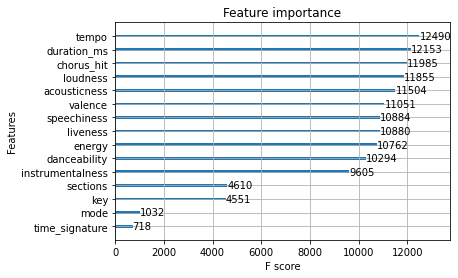

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()


Creating and defining our Deep Learning Model Architecture

In [ ]:
#Create a sequential model
from tensorflow.keras.models import Sequential
modell = Sequential() 

from tensorflow.keras.layers import Dense
number_inputs = 15  

#Create hidden layers
modell.add(Dense(units=14,activation='relu', input_dim=number_inputs))
modell.add(Dense(units=120,activation='relu'))
modell.add(Dense(units=80,activation='relu'))

#Create output layer
number_classes = 2
modell.add(Dense(units=number_classes, activation='softmax'))

In [ ]:
#Model Summary
modell.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 14)                224       
_________________________________________________________________
dense_5 (Dense)              (None, 120)               1800      
_________________________________________________________________
dense_6 (Dense)              (None, 80)                9680      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 162       
Total params: 11,866
Trainable params: 11,866
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile the Model
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
modell.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

**Training the Model**

In [ ]:
#Training the Model
history = modell.fit(x_train_scaled, y_train_categorical, epochs=500, batch_size=2000, shuffle=True, verbose=2)

Epoch 1/500
16/16 - 0s - loss: 0.6191 - accuracy: 0.6505
Epoch 2/500
16/16 - 0s - loss: 0.5691 - accuracy: 0.6928
Epoch 3/500
16/16 - 0s - loss: 0.5486 - accuracy: 0.7120
Epoch 4/500
16/16 - 0s - loss: 0.5353 - accuracy: 0.7232
Epoch 5/500
16/16 - 0s - loss: 0.5251 - accuracy: 0.7322
Epoch 6/500
16/16 - 0s - loss: 0.5176 - accuracy: 0.7382
Epoch 7/500
16/16 - 0s - loss: 0.5122 - accuracy: 0.7422
Epoch 8/500
16/16 - 0s - loss: 0.5076 - accuracy: 0.7457
Epoch 9/500
16/16 - 0s - loss: 0.5036 - accuracy: 0.7482
Epoch 10/500
16/16 - 0s - loss: 0.4997 - accuracy: 0.7516
Epoch 11/500
16/16 - 0s - loss: 0.4960 - accuracy: 0.7548
Epoch 12/500
16/16 - 0s - loss: 0.4930 - accuracy: 0.7572
Epoch 13/500
16/16 - 0s - loss: 0.4901 - accuracy: 0.7574
Epoch 14/500
16/16 - 0s - loss: 0.4884 - accuracy: 0.7588
Epoch 15/500
16/16 - 0s - loss: 0.4876 - accuracy: 0.7613
Epoch 16/500
16/16 - 0s - loss: 0.4844 - accuracy: 0.7624
Epoch 17/500
16/16 - 0s - loss: 0.4834 - accuracy: 0.7636
Epoch 18/500
16/16 - 0s


**Validation of the Model**

In [ ]:
#Evaluate the Model using the testing data
#Compare Model performace between training and testing data
model_loss_train, model_accuracy_train = modell.evaluate(x_train_scaled, y_train_categorical, verbose=2)
model_loss, model_accuracy = modell.evaluate(x_test_scaled, y_test_categorical, verbose=2)

print(f"TRAINING DATA --> Loss: {model_loss_train}, Accuracy: {model_accuracy_train}")    
print(f"TESTING DATA --> Loss: {model_loss}, Accuracy: {model_accuracy}")


964/964 - 2s - loss: 0.3506 - accuracy: 0.8413
322/322 - 1s - loss: 0.5612 - accuracy: 0.7493
TRAINING DATA --> Loss: 0.35061755776405334, Accuracy: 0.8413182497024536
TESTING DATA --> Loss: 0.561180830001831, Accuracy: 0.74934321641922


In [ ]:
pickle.dump(rf,open("final.pickle","wb"))

In [ ]:
# pickle list object

pickle.dump(rf, open("spotify_api/model.pickle.dat", "wb"))
# model_pickle.close()